# Documentation Notebook

This notebook is used to make graphs, vizualizations, etc. to explain the data processed in other notebooks. Mainly for the website and video summary.

In [1]:
# import frameworks

%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

Helper function to create a directory under the specified path, gracefully handling errors.

In [2]:
def __mkdir(*args):
    path = os.path.join(*args)
    try: 
        os.makedirs(path)
    except OSError:
        if not os.path.isdir(path):
            raise
    return path

In [3]:
# define paths

working_dir = os.getcwd()
data_dir = __mkdir(working_dir, "data")
images_dir = __mkdir(working_dir, "images")

# Original data information


In [4]:
ctgov_data = pd.read_pickle(os.path.join(data_dir, 'ctgov.pckl'))

In [5]:
ctgov_data.shape

(1347, 187)

# Criteria Inclusion/Exclusion Graphs


In [6]:
ct_criteria = pd.read_pickle(os.path.join(data_dir, "ct_criteria.pckl"))
ct_criteria.head()

,Criteria,Include,NctId,TokenCount,Tokens,criteria_id
0,"History of uncontrolled seizures, at the prese...",True,NCT00001149,36,"[History, of, uncontrolled, seizures, ,, at, t...",0
1,"Seizure frequency, by history, must be suffici...",True,NCT00001149,30,"[Seizure, frequency, ,, by, history, ,, must, ...",1
2,Patients of any age may be accepted.,True,NCT00001149,8,"[Patients, of, any, age, may, be, accepted, .]",2
3,"Patients (and parents or guardians, if applica...",True,NCT00001149,43,"[Patients, (, and, parents, or, guardians, ,, ...",3
4,Patients.,True,NCT00001192,2,"[Patients, .]",4


In [7]:
"""
Function
--------
criteria_counts

Inputs
------
group : groupby on NctId group
   
Returns
-------
Pandas Data Frame with IncludedCriteria, ExcludedCriteria, TotalCriteria, TotalTokens and NctId as index
     
Notes
-----

"""
def criteria_counts(group):
    NctId = ""
    total = 0
    totalTokens = 0
    included = 0
    excluded = 0
    for i in group.index:
        total += 1
        totalTokens += group["TokenCount"][i]
        if NctId == "":
            NctId = group["NctId"][i]
        if group["Include"][i]:
            included += 1
        else:
            excluded += 1
    row_dict = {"IncludedCriteria":included,"ExcludedCriteria":excluded,"TotalCriteria":total,"TotalTokens":totalTokens}
    df = pd.DataFrame(columns=(list(row_dict.keys())))
    df.loc[NctId] = list(row_dict.values())
    return df

In [11]:
ct_criteria_counts = ct_criteria.groupby('NctId').apply(criteria_counts).reset_index()
ct_criteria_counts.head(10)

,NctId,level_1,ExcludedCriteria,TotalTokens,TotalCriteria,IncludedCriteria
0,NCT00001149,NCT00001149,0,117,4,4
1,NCT00001192,NCT00001192,2,42,4,2
2,NCT00001205,NCT00001205,5,254,10,5
3,NCT00001218,NCT00001218,0,17,3,3
4,NCT00001262,NCT00001262,1,56,2,1
5,NCT00001289,NCT00001289,3,232,7,4
6,NCT00001325,NCT00001325,3,36,4,1
7,NCT00001366,NCT00001366,0,51,5,5
8,NCT00001404,NCT00001404,1,280,6,5
9,NCT00001489,NCT00001489,0,29,5,5


In [13]:
"""
Function
--------
plot_histogram

Inputs
------
data : Array of numbers for histogram
title : String for title
xlabel : String for xlabel
ylabel : String for ylabel
save : True if the histogram should be saved to the images folder
   
Returns
-------


"""
def plot_histogram(data, title, xlabel, ylabel, save = False):
    plt.hist(data, bins=np.arange(data.min(),data.max(),1))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.axvline(data.mean(), 0, 1, color='g', label='Mean')
    plt.axvline(data.quantile(.25), 0, 1, color='r', label='Q1')
    plt.axvline(data.quantile(.5), 0, 1, color='r', label='Q2')
    plt.axvline(data.quantile(.75), 0, 1, color='r', label='Q3')
    if save:
        name_ext = "%s.png" % title
        save_url = os.path.join(images_dir, name_ext)
        plt.savefig(save_url)

count    1341.000000
mean        6.064131
std         6.345082
min         0.000000
25%         3.000000
50%         4.000000
75%         7.000000
max        62.000000
Name: IncludedCriteria, dtype: float64

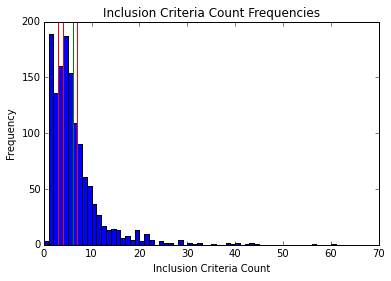

In [16]:
plot_histogram(ct_criteria_counts["IncludedCriteria"], "Inclusion Criteria Count Frequencies", "Inclusion Criteria Count", "Frequency", True)
ct_criteria_counts["IncludedCriteria"].describe()

count    1341.000000
mean        6.880686
std         6.297175
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        44.000000
Name: ExcludedCriteria, dtype: float64

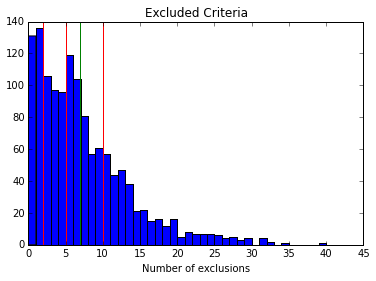

In [15]:
plot_histogram(ct_criteria_counts["ExcludedCriteria"], "Excluded Criteria", "Number of exclusions", "", True)
ct_criteria_counts["ExcludedCriteria"].describe()